# Capstone Project (CA2)

## 1) Data Understanding

### 1.1) Load the dataset

In [4]:
# We can suppress the warnings
import warnings
warnings.filterwarnings('ignore') 

In [5]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [6]:
# Uploading the dataset
airbnb_df = pd.read_csv("Airbnb_Data.csv")

In [7]:
# Showing the data
airbnb_df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


### 1.2) Describe the data

In [9]:
# Data Format
# Summary statistics for numerical columns
airbnb_df.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [10]:
# Summary statistics for categorical columns
airbnb_df.describe(include=['object'])

,property_type,room_type,amenities,bed_type,cancellation_policy,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,name,neighbourhood,thumbnail_url,zipcode
count,74111,74111,74111,74111,74111,74111,74111,58247,73923,73923,55812,73923,74111,58284,74111,67239,65895,73145
unique,35,3,67122,5,5,6,73479,2554,2,2,80,3087,2,1371,73359,619,65883,769
top,Apartment,Entire home/apt,{},Real Bed,strict,NYC,"Hello, I've been running guest house for Korea...",2017-01-01,t,t,100%,2015-03-30,f,2017-04-30,Bunk bed in the Treat Street Clubhouse,Williamsburg,https://a0.muscache.com/im/pictures/70087089/b...,11211.0
freq,49003,41310,586,72028,32374,32349,8,293,73697,49748,43254,246,54660,1344,8,2862,3,1368


In [11]:
# Number of Records
airbnb_df.shape

(74111, 29)

In [12]:
# See all the columns
airbnb_df.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [13]:
# Identifying categorical and numerical columns.
airbnb_df.dtypes

id                          int64
log_price                 float64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
description                object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
thumbnail_url              object
zipcode                    object
bedrooms                  float64
beds                      float64
dtype: object

In [14]:
# Return DataFrame with counts of unique elements in each position.
# Unique values in categorical columns:
print("\nUnique values in categorical columns:")
for column in airbnb_df.select_dtypes(include=['object']).columns:
    print("\n", column, ":", airbnb_df[column].nunique())
    print(airbnb_df[column].value_counts().head(10))


Unique values in categorical columns:

 property_type : 35
property_type
Apartment          49003
House              16511
Condominium         2658
Townhouse           1692
Loft                1244
Other                607
Guesthouse           498
Bed & Breakfast      462
Bungalow             366
Villa                179
Name: count, dtype: int64

 room_type : 3
room_type
Entire home/apt    41310
Private room       30638
Shared room         2163
Name: count, dtype: int64

 amenities : 67122
amenities
{}                                                                                                                                                                                                                                                                                                                                         586
{"translation missing: en.hosting_amenity_49","translation missing: en.hosting_amenity_50"}                                                                   

### 1.3) Explore data

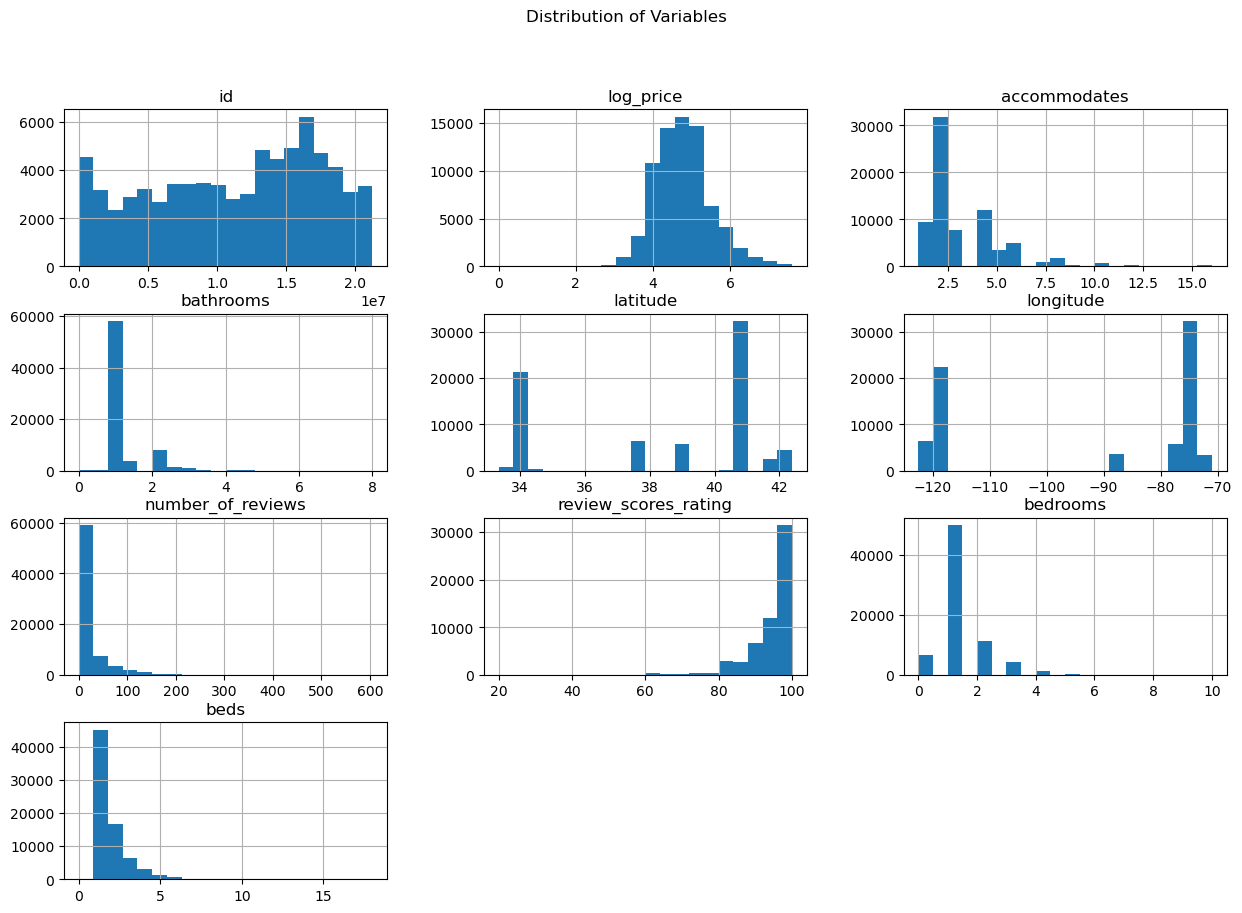

In [16]:
airbnb_df.hist(bins=20, figsize=(15, 10))
plt.suptitle("Distribution of Variables")
plt.show()

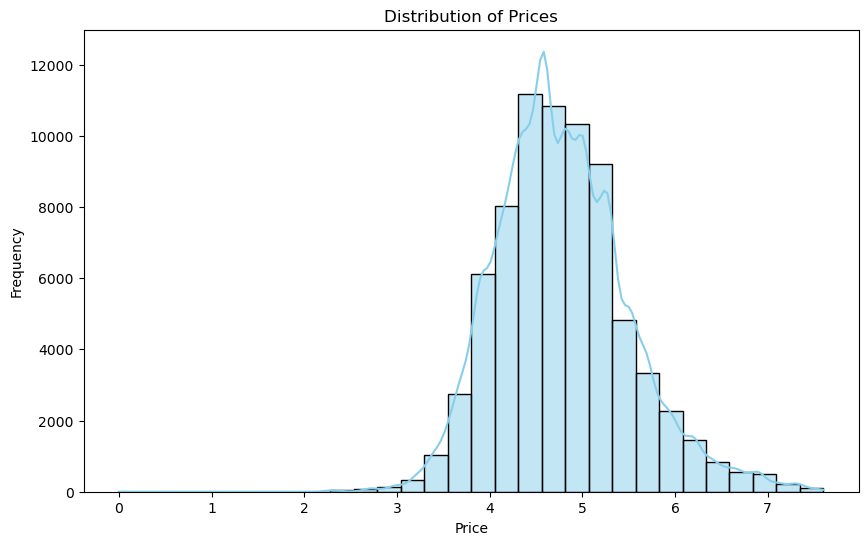

In [17]:
# Visualise using EDA.
# Histogram of prices
plt.figure(figsize=(10, 6))
sns.histplot(airbnb_df['log_price'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

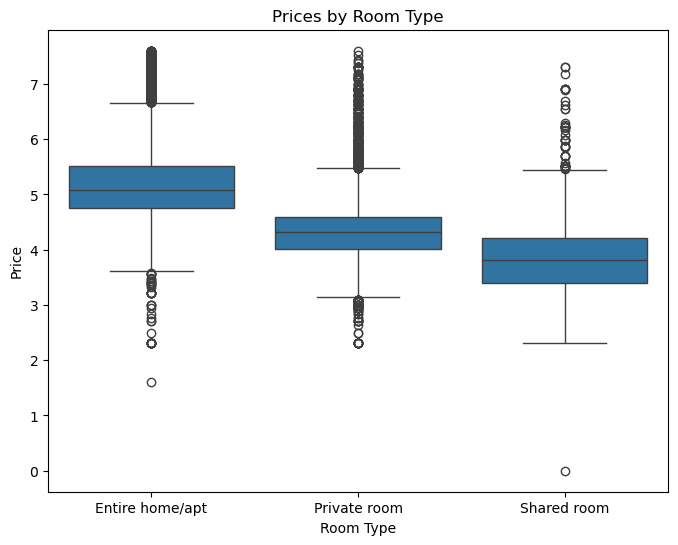

In [18]:
# Box plot of prices by room type
plt.figure(figsize=(8, 6))
sns.boxplot(x='room_type', y='log_price', data=airbnb_df)
plt.title('Prices by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

### 1.4) Verify data quality

In [20]:
# How clean/ dirty?
# Check for missing values
print("\nMissing values in the dataset:")
print(airbnb_df.isnull().sum())


Missing values in the dataset:
id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64


In [21]:
# Document any quality issues
# Check for duplicated rows
airbnb_df.duplicated().sum()

0

In [22]:
# Check for inconsistent data
# Check if numerical columns have negative values (assuming it's not applicable)
negative_values = (airbnb_df.select_dtypes(include=['number']) < 0).sum()

In [23]:
negative_values

id                          0
log_price                   0
accommodates                0
bathrooms                   0
latitude                    0
longitude               74111
number_of_reviews           0
review_scores_rating        0
bedrooms                    0
beds                        0
dtype: int64

## 2) Data Preparation

### 2.1) Clean data

In [26]:
# Handle missing values
# Option 1: Remove rows with missing values
airbnb_df_cleaned = airbnb_df.dropna()

In [27]:
airbnb_df_cleaned.shape

(38502, 29)

In [28]:
# Remove outliers if necessary
airbnb_df_cleaned = airbnb_df_cleaned[(airbnb_df_cleaned['log_price'] > 0) & (airbnb_df_cleaned['log_price'] < 1000)]

In [29]:
# Checking missing values 
print("\nMissing values after cleaning:")
print(airbnb_df_cleaned.isnull().sum())


Missing values after cleaning:
id                        0
log_price                 0
property_type             0
room_type                 0
amenities                 0
accommodates              0
bathrooms                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                      0
description               0
first_review              0
host_has_profile_pic      0
host_identity_verified    0
host_response_rate        0
host_since                0
instant_bookable          0
last_review               0
latitude                  0
longitude                 0
name                      0
neighbourhood             0
number_of_reviews         0
review_scores_rating      0
thumbnail_url             0
zipcode                   0
bedrooms                  0
beds                      0
dtype: int64


In [30]:
print("\nUnique values in categorical columns:")
for column in airbnb_df.select_dtypes(include=['object']).columns:
    print("\n", column, ":", airbnb_df[column].nunique())
    print(airbnb_df[column].value_counts().head(29))


Unique values in categorical columns:

 property_type : 35
property_type
Apartment             49003
House                 16511
Condominium            2658
Townhouse              1692
Loft                   1244
Other                   607
Guesthouse              498
Bed & Breakfast         462
Bungalow                366
Villa                   179
Dorm                    142
Guest suite             123
Camper/RV                94
Timeshare                77
Cabin                    72
In-law                   71
Hostel                   70
Boutique hotel           69
Boat                     65
Serviced apartment       21
Tent                     18
Castle                   13
Vacation home            11
Yurt                      9
Hut                       8
Treehouse                 7
Chalet                    6
Earth House               4
Tipi                      3
Name: count, dtype: int64

 room_type : 3
room_type
Entire home/apt    41310
Private room       30638
Shared room 

name
Bunk bed in the Treat Street Clubhouse    8
Your home away from home                  7
East Village Studio                       7
Cozy Private Room                         6
Location, Location, Location              6
Spacious Private Room in Brooklyn         6
Charming East Village Apartment           5
Downtown LA Loft                          5
Spacious Brooklyn Apartment               5
Welcoming, Clean, Cheap on St Marks       4
Kanmore Guest House                       4
Cozy Williamsburg Apartment               4
Studio                                    4
Spacious Private Room                     4
Brooklyn Oasis                            4
Upper West Side Studio                    4
Home sweet home                           4
Newly Renovated Long Island City Room     4
Studio in the heart of Manhattan          4
SHARED ROOM in VENICE BEACH HOSTEL        4
Paradise                                  4
HOME AWAY FROM HOME                       4
Beautiful Studio Apartment 

In [31]:
from sklearn.preprocessing import LabelEncoder

# Select categorical columns to be label encoded
categorical_cols = ['property_type', 'room_type', 'amenities', 'bed_type',
                    'cancellation_policy', 'city', 'description', 'first_review',
                    'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
                    'host_since', 'instant_bookable', 'last_review', 'name', 'neighbourhood',
                    'thumbnail_url', 'cleaning_fee'] 

In [32]:
# Apply label encoding the categorical columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    airbnb_df[col] = label_encoder.fit_transform(airbnb_df[col])

In [33]:
# Display the updated DataFrame
airbnb_df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,0,0,6142,3,1.0,4,2,1,...,40.696524,-73.991617,10464,77,2,100.0,32398,11201,1.0,1.0
1,6304928,5.129899,0,0,6269,7,1.0,4,2,1,...,40.766115,-73.989040,65672,252,6,93.0,16220,10019,3.0,3.0
2,7919400,4.976734,0,0,21345,5,1.0,4,1,1,...,40.808110,-73.943756,66396,247,10,92.0,32852,10027,1.0,3.0
3,13418779,6.620073,17,0,38854,4,1.0,4,0,1,...,37.772004,-122.431619,9387,325,0,NaN,33692,94117.0,2.0,2.0
4,3808709,4.744932,0,0,55413,2,1.0,4,1,1,...,38.925627,-77.034596,32068,119,4,40.0,65883,20009,0.0,1.0


In [34]:
# Delete specific column using drop() function
column_to_delete = 'longitude'
airbnb_df = airbnb_df.drop(column_to_delete, axis=1)

In [35]:
# Delete specific column using drop() function
column_to_delete = 'zipcode'
airbnb_df = airbnb_df.drop(column_to_delete, axis=1)

In [36]:
airbnb_df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,instant_bookable,last_review,latitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,bedrooms,beds
0,6901257,5.010635,0,0,6142,3,1.0,4,2,1,...,0,926,40.696524,10464,77,2,100.0,32398,1.0,1.0
1,6304928,5.129899,0,0,6269,7,1.0,4,2,1,...,1,1358,40.766115,65672,252,6,93.0,16220,3.0,3.0
2,7919400,4.976734,0,0,21345,5,1.0,4,1,1,...,1,1349,40.808110,66396,247,10,92.0,32852,1.0,3.0
3,13418779,6.620073,17,0,38854,4,1.0,4,0,1,...,0,1371,37.772004,9387,325,0,NaN,33692,2.0,2.0
4,3808709,4.744932,0,0,55413,2,1.0,4,1,1,...,1,1114,38.925627,32068,119,4,40.0,65883,0.0,1.0


In [37]:
# Using .unique() to check  missing values
airbnb_df["review_scores_rating"].unique()

array([100.,  93.,  92.,  nan,  40.,  97.,  99.,  90.,  89.,  91.,  88.,
        86.,  72.,  98.,  95.,  96.,  84.,  80.,  94.,  87.,  85.,  70.,
        60.,  75.,  20.,  76.,  83.,  82.,  78.,  73.,  55.,  81.,  67.,
        71.,  77.,  79.,  47.,  74.,  68.,  66.,  63.,  50.,  53.,  65.,
        64.,  27.,  69.,  30.,  58.,  35.,  62.,  49.,  57.,  54.,  56.])

In [38]:
# .replace() is a method that can be used in Series or DataFrames 
#to replace specific values with other values
airbnb_df.replace("UnKnown", pd.NA, inplace=True)
airbnb_df.replace("?", pd.NA, inplace=True)
airbnb_df.replace(" ", pd.NA, inplace=True)
airbnb_df.replace("Na", pd.NA, inplace=True)
airbnb_df.replace("nan", pd.NA, inplace=True) 
airbnb_df.replace("NaN", pd.NA, inplace=True)

In [39]:
# Remove missing values
airbnb_df.dropna(inplace=True)

In [40]:
# Converting all the types of data
airbnb_df['property_type'] = airbnb_df['property_type'].astype('int64')
airbnb_df['room_type'] = airbnb_df['room_type'].astype('int64')
airbnb_df['amenities'] = airbnb_df['amenities'].astype('int64')
airbnb_df['bed_type'] = airbnb_df['bed_type'].astype('int64')
airbnb_df['cancellation_policy'] = airbnb_df['cancellation_policy'].astype('int64')
airbnb_df['city'] = airbnb_df['city'].astype('int64')
airbnb_df['description'] = airbnb_df['description'].astype('int64')
airbnb_df['first_review'] = airbnb_df['first_review'].astype('int64')
airbnb_df['host_has_profile_pic'] = airbnb_df['host_has_profile_pic'].astype('int64')
airbnb_df['host_identity_verified'] = airbnb_df['host_identity_verified'].astype('int64')
airbnb_df['host_response_rate'] = airbnb_df['host_response_rate'].astype('int64')
airbnb_df['host_since'] = airbnb_df['host_since'].astype('int64')
airbnb_df['instant_bookable'] = airbnb_df['instant_bookable'].astype('int64')
airbnb_df['last_review'] = airbnb_df['last_review'].astype('int64')
airbnb_df['name'] = airbnb_df['name'].astype('int64')
airbnb_df['neighbourhood'] = airbnb_df['neighbourhood'].astype('int64')
airbnb_df['thumbnail_url'] = airbnb_df['thumbnail_url'].astype('int64')
airbnb_df['cleaning_fee'] = airbnb_df['cleaning_fee'].astype('int64')

In [41]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57129 entries, 0 to 74110
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      57129 non-null  int64  
 1   log_price               57129 non-null  float64
 2   property_type           57129 non-null  int64  
 3   room_type               57129 non-null  int64  
 4   amenities               57129 non-null  int64  
 5   accommodates            57129 non-null  int64  
 6   bathrooms               57129 non-null  float64
 7   bed_type                57129 non-null  int64  
 8   cancellation_policy     57129 non-null  int64  
 9   cleaning_fee            57129 non-null  int64  
 10  city                    57129 non-null  int64  
 11  description             57129 non-null  int64  
 12  first_review            57129 non-null  int64  
 13  host_has_profile_pic    57129 non-null  int64  
 14  host_identity_verified  57129 non-null  int

In [42]:
airbnb_df_clean = airbnb_df

In [43]:
airbnb_df_clean.to_csv("airbnb_df_clean.csv", index=False)

In [44]:
# Identify relationship among the data
# Calculate correlation matrix
correlation_matrix = airbnb_df.corr()

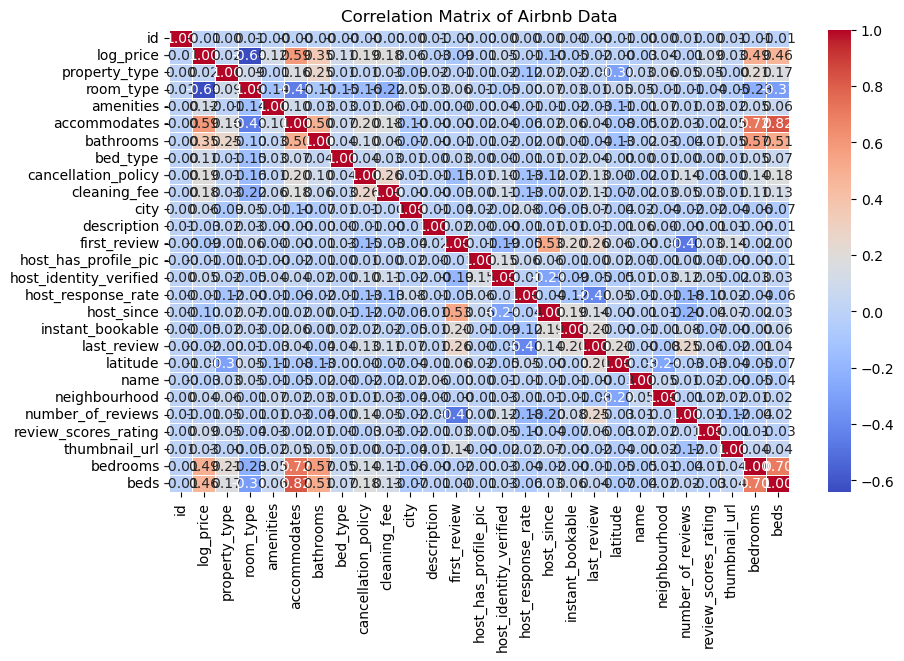

In [45]:
# Plot correlation matrix heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Airbnb Data')
plt.show()

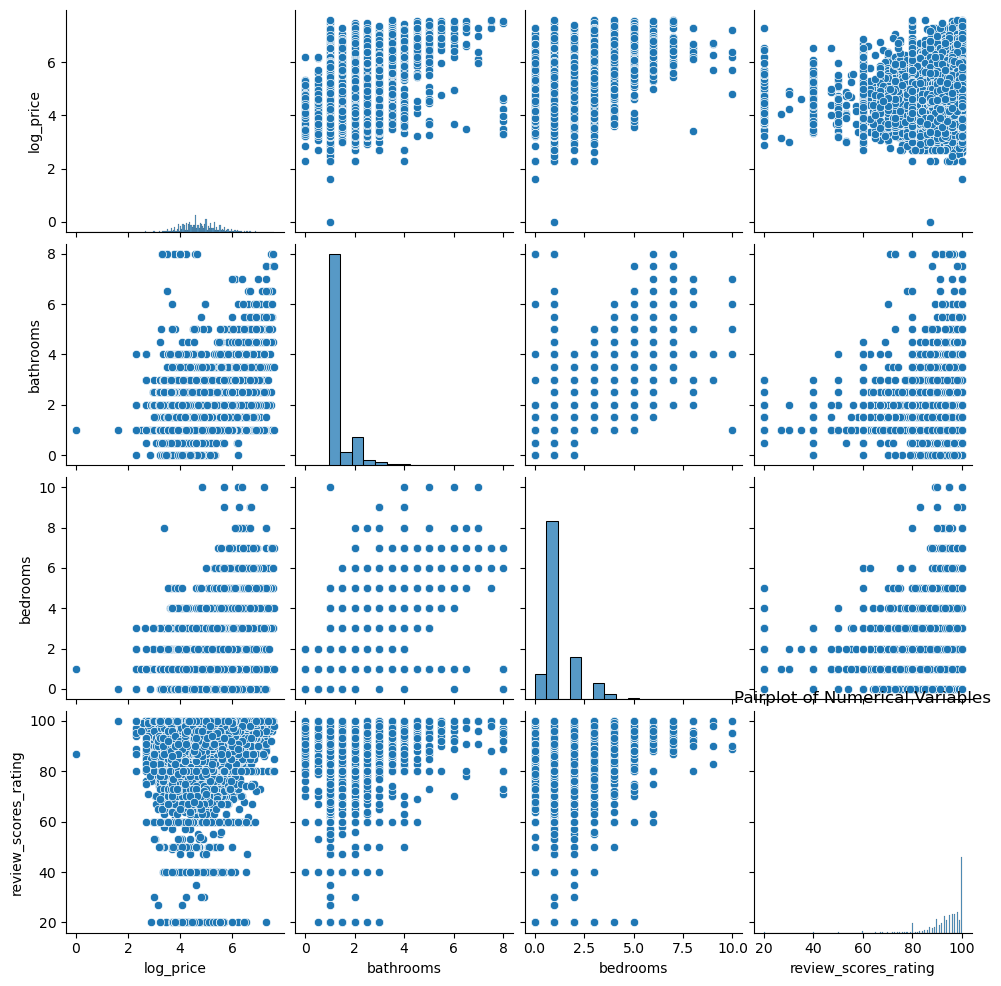

In [46]:
# Pairplot to visualize relationships between numerical variables
sns.pairplot(airbnb_df[['log_price', 'bathrooms', 'bedrooms', 'review_scores_rating']])
plt.title('Pairplot of Numerical Variables')
plt.show()

## 3) Modeling

#### LinearRegression Model

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

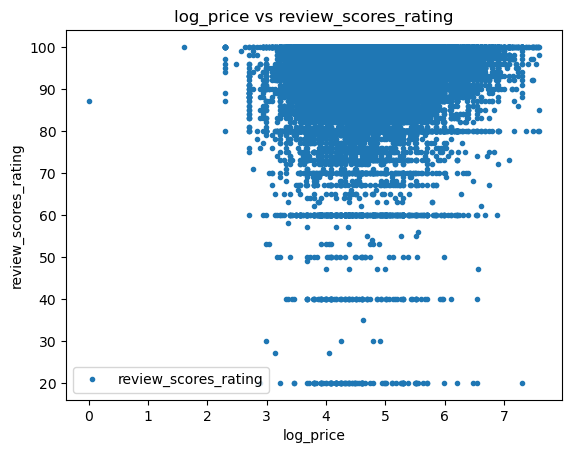

In [50]:
airbnb_df.plot(x='log_price', y='review_scores_rating', style='.')
plt.title('log_price vs review_scores_rating')
plt.xlabel('log_price')
plt.ylabel('review_scores_rating')
plt.show()

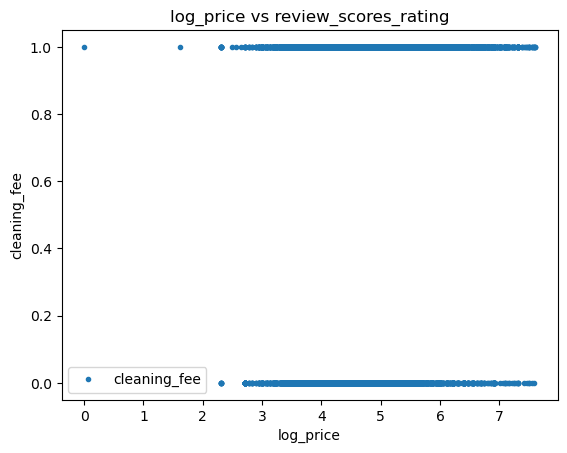

In [51]:
airbnb_df.plot(x='log_price', y='cleaning_fee', style='.')
plt.title('log_price vs review_scores_rating')
plt.xlabel('log_price')
plt.ylabel('cleaning_fee')
plt.show()

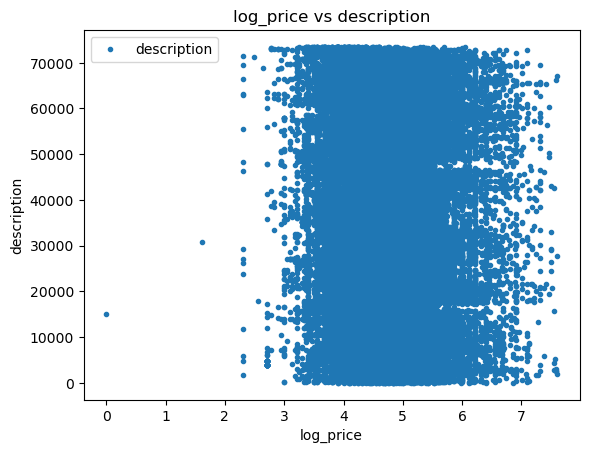

In [52]:
airbnb_df.plot(x='log_price', y='description', style='.')
plt.title('log_price vs description')
plt.xlabel('log_price')
plt.ylabel('description')
plt.show()

In [53]:
# Split the dataset into X and y columns
X = airbnb_df.iloc[:, :-1].values            # Independent variables as area in safeet
y = airbnb_df.iloc[:, 1].values  

In [54]:
print(X,y)

[[6.90125700e+06 5.01063529e+00 0.00000000e+00 ... 1.00000000e+02
  3.23980000e+04 1.00000000e+00]
 [6.30492800e+06 5.12989871e+00 0.00000000e+00 ... 9.30000000e+01
  1.62200000e+04 3.00000000e+00]
 [7.91940000e+06 4.97673374e+00 0.00000000e+00 ... 9.20000000e+01
  3.28520000e+04 1.00000000e+00]
 ...
 [1.32818090e+07 5.04342512e+00 0.00000000e+00 ... 9.30000000e+01
  1.36950000e+04 2.00000000e+00]
 [1.86880390e+07 5.22035583e+00 0.00000000e+00 ... 9.40000000e+01
  3.74840000e+04 2.00000000e+00]
 [3.53484500e+06 4.85203026e+00 2.00000000e+00 ... 9.60000000e+01
  1.09020000e+04 1.00000000e+00]] [5.01063529 5.12989871 4.97673374 ... 5.04342512 5.22035583 4.85203026]


In [55]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [56]:
# Show the rows and columns
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((57129, 26), (57129,), (45703, 26), (11426, 26), (45703,), (11426,))

In [57]:
# Method to calculate the score
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv = 10,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [58]:
# Train the model
lr = LinearRegression().fit(X_train, y_train)

# Calculate the mean values and Standard deviation
get_cv_scores(lr)

CV Mean:  1.0
STD:  0.0




In [59]:
# Calculate the intercept and coefficient
print(lr.intercept_)
print(lr.coef_)

-7.140954494389007e-13
[-5.16273529e-22  1.00000000e+00  2.03388005e-14 -3.74567347e-14
  6.37944392e-20  2.06532426e-13  1.99770619e-13 -9.42835988e-16
  1.10894515e-13  4.95504624e-14 -8.24393262e-14  6.31085829e-18
  8.30876647e-16 -3.79739788e-13  8.44372393e-14  9.33060376e-16
  1.41415439e-16  1.86536257e-14  2.63993262e-16 -1.28445137e-14
  1.56983891e-18  4.41179529e-17 -1.33636926e-15 -2.50577044e-14
  2.25244779e-17  9.21603328e-15]


In [60]:
# Calculate the predicted values
y_pred = lr.predict(X_test)
# y_pred
print(y_pred)

[3.91202301 4.09434456 3.91202301 ... 4.38202663 4.48863637 4.17438727]


In [61]:
# Display the test and predicted values
airbnb_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
airbnb_df.head(20)

,Actual,Predicted
0,3.912023,3.912023
1,4.094345,4.094345
2,3.912023,3.912023
3,4.094345,4.094345
4,4.174387,4.174387
5,4.317488,4.317488
6,4.442651,4.442651
7,4.828314,4.828314
8,4.867534,4.867534
9,4.787492,4.787492


In [62]:
# Calculate the error values
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 7.855667999719299e-13
Mean Squared Error: 1.038369681942538e-24
Root Mean Squared Error: 1.0190042600217813e-12


# Plot Model Predictions 

In [64]:
# Using .fit() to train a model on a dataset:
model = LinearRegression().fit(X_train, y_train)

In [65]:
# Using .predict() to make predictions on new, using a trained model.
y_pred = model.predict(X_test)

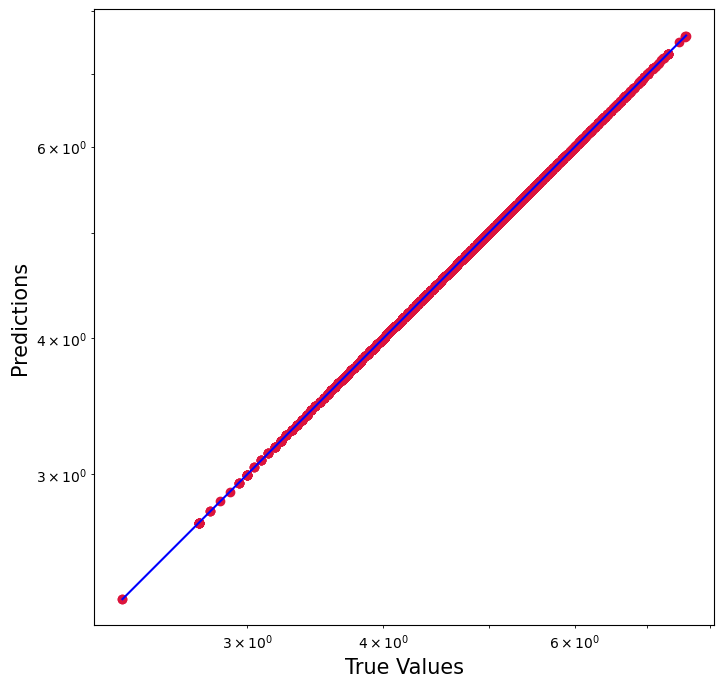

In [66]:
# Visualization
plotSplit = 500
plt.figure(figsize=(8,8))
plt.scatter(y_test[plotSplit:], y_pred[plotSplit:], c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred[plotSplit:]), max(y_test[plotSplit:]))
p2 = min(min(y_pred[plotSplit:]), min(y_test[plotSplit:]))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show();

#### Residuals Plot
Residuals, in the context of regression models, are the difference between the observed value of the target variable (y) and the predicted value (ŷ), i.e. the error of the prediction. The residuals plot shows the difference between residuals on the vertical axis and the dependent variable on the horizontal axis, allowing you to detect regions within the target that may be susceptible to more or less error.

https://www.scikit-yb.org/en/latest/api/regressor/residuals.html

In [69]:
!pip install yellowbrick

  Using cached yellowbrick-1.5-py3-none-any.whl.metadata (7.7 kB)
Using cached yellowbrick-1.5-py3-none-any.whl (282 kB)


In [71]:
from yellowbrick.regressor import ResidualsPlot, PredictionError, prediction_error

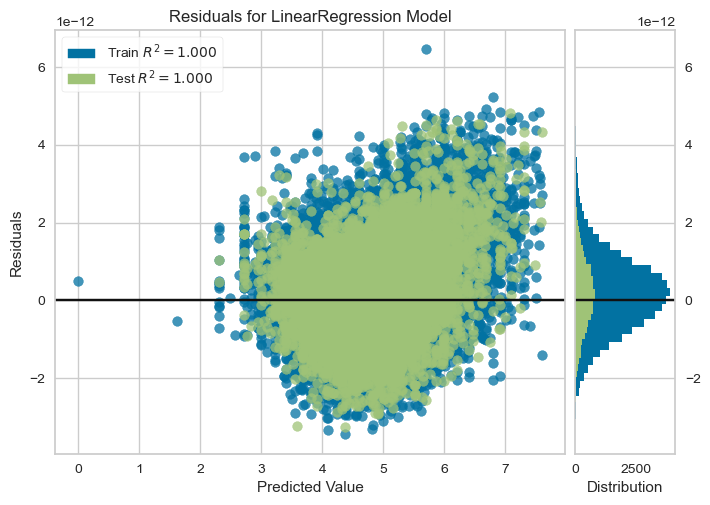

In [73]:
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();   

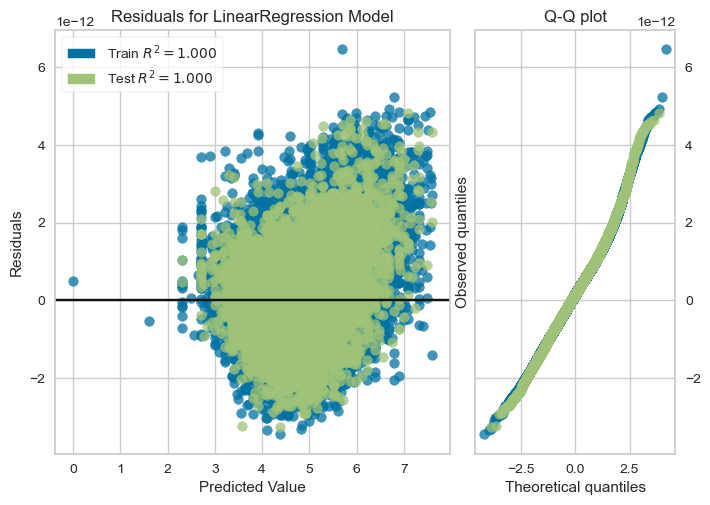

In [75]:
visualizer = ResidualsPlot(model, hist=False, qqplot=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

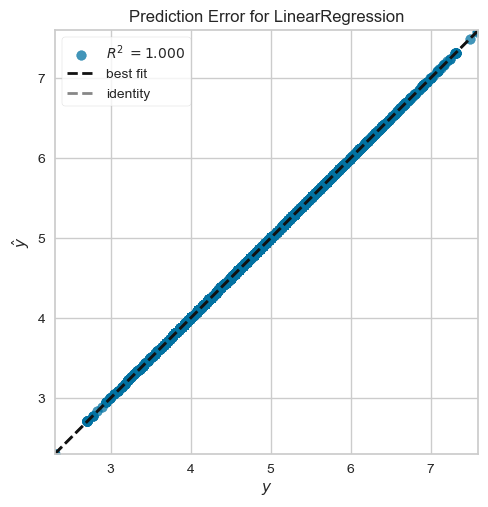

In [77]:
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

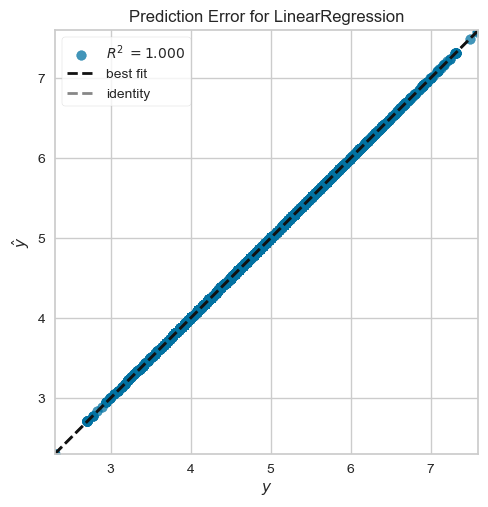

In [79]:
visualizer = prediction_error(model, X_train, y_train, X_test, y_test)

## OTHER MODELS - Random Forest & Decision Tree

In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split  
from sklearn import metrics                           
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [85]:
df_2_model = pd.read_csv("airbnb_df_clean.csv")

In [87]:
df_2_model.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,instant_bookable,last_review,latitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,bedrooms,beds
0,6901257,5.010635,0,0,6142,3,1.0,4,2,1,...,0,926,40.696524,10464,77,2,100.0,32398,1.0,1.0
1,6304928,5.129899,0,0,6269,7,1.0,4,2,1,...,1,1358,40.766115,65672,252,6,93.0,16220,3.0,3.0
2,7919400,4.976734,0,0,21345,5,1.0,4,1,1,...,1,1349,40.808110,66396,247,10,92.0,32852,1.0,3.0
3,3808709,4.744932,0,0,55413,2,1.0,4,1,1,...,1,1114,38.925627,32068,119,4,40.0,65883,0.0,1.0
4,12422935,4.442651,0,1,50079,2,1.0,4,2,1,...,1,1340,37.753164,19652,391,3,100.0,38394,1.0,1.0


In [89]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X = df_2_model.drop(columns=["log_price"])
y = df_2_model["log_price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

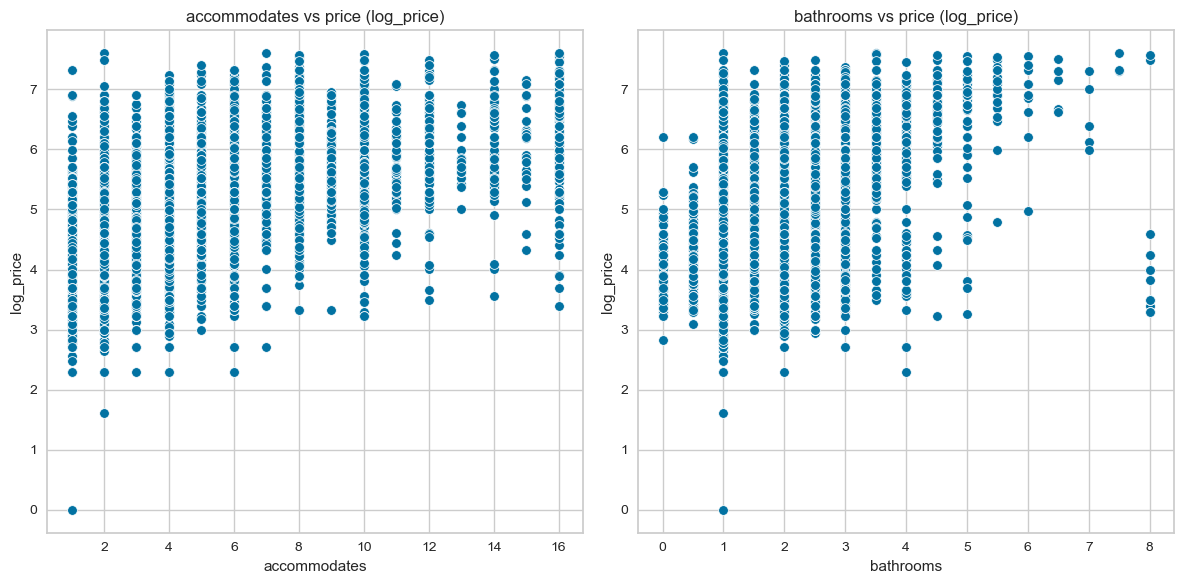

In [91]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=X_train['accommodates'], y=y_train)
plt.title("accommodates vs price (log_price)")

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_train['bathrooms'], y=y_train)
plt.title("bathrooms vs price (log_price)")

plt.tight_layout()
plt.show()

In [95]:
random_forest = RandomForestRegressor(n_estimators=10, random_state=42)
random_forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [97]:
random_forest = RandomForestRegressor(n_estimators=10, random_state=42)
random_forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [99]:
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [101]:
# Decision Tree
y_pred_tree = decision_tree.predict(X_test)
rmse_tree = np.sqrt(mean_squared_error(y_test, y_pred_tree))
r2_tree = r2_score(y_test, y_pred_tree)

print("Decision Tree - RMSE:", rmse_tree)
print("Decision Tree - R²:", r2_tree)

Decision Tree - RMSE: 0.5207786466455262
Decision Tree - R²: 0.3990228931116542


In [103]:
# Random Forest
y_pred_forest = random_forest.predict(X_test)
rmse_forest = np.sqrt(mean_squared_error(y_test, y_pred_forest))
r2_forest = r2_score(y_test, y_pred_forest)

print("Random Forest - RMSE:", rmse_forest)
print("Random Forest - R²:", r2_forest)

Random Forest - RMSE: 0.38142967254946786
Random Forest - R²: 0.6776107577164981


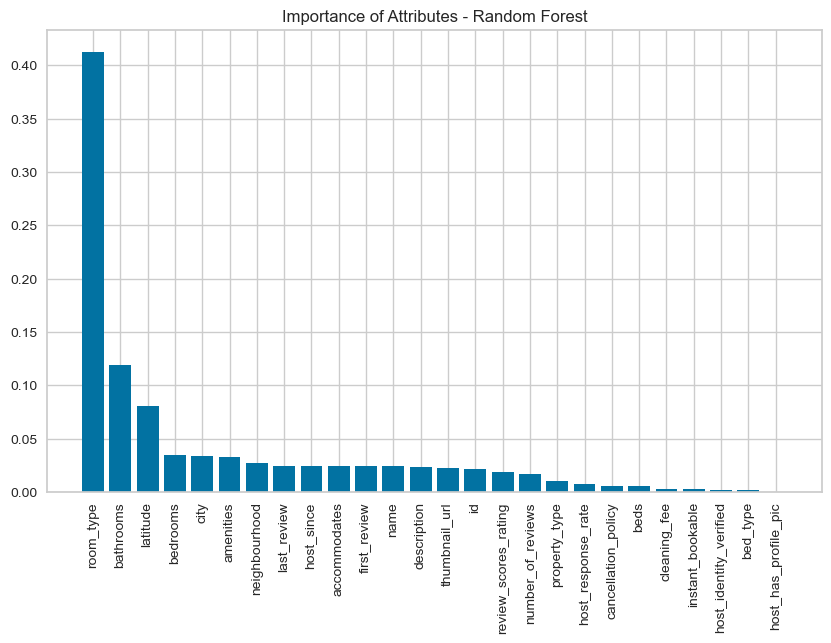

In [105]:
import matplotlib.pyplot as plt

# Importance of Attributes
importances = random_forest.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Importance of Attributes - Random Forest")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=90)
plt.show()

In [125]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [133]:
model = RandomForestRegressor()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

I COULDN'T RUN THE TUNNING. 